Laura López Bedoya

# Taller de algortimos de machine learning no supervisado

### Segmentación de clientes K-means

In [ ]:
#Procesamiento
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (50, 20)
plt.style.use('ggplot')

#ML
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

__Cargar datos__

In [ ]:
data = pd.read_excel('Ejercicio_120821.xlsx', sheet_name='BD')
data.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,Es Contactable,Ciudad de Residencia,Mail,Direccion,Genero,Estado Civil,Fecha Nacimiento,Mes Nacimiento,Dia Nacimiento,Edad,Monto Total de ultima compra,Cantidad Articulos,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Direccion Valido?,Mail Valido?,Cel Valido?,Tel Ofc Valid?,Tel Casa Valido?,Telefono Movil,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,Si,BUCARAMANGA,NaN,NaN,Mujer,No hay informacion,19000225,Febrero,25,111,719400,10,12,6,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,Si,BARRANQUILLA,NaN,NaN,Hombre,No hay informacion,19561016,Octubre,16,54,179900,1,12,1,Si,Si,No,No,Si,NaN,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,Si,BARRANQUILLA,NaN,NaN,Mujer,No hay informacion,19550707,Julio,7,55,921700,25,9,13,Si,Si,Si,No,Si,NaN,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,Si,MANIZALES,NaN,NaN,Mujer,No hay informacion,19620520,Mayo,20,48,2235300,50,2,17,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,Si,FLORIDABLANCA,NaN,NaN,Mujer,No hay informacion,19660709,Julio,9,44,362500,8,3,5,Si,Si,Si,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0


__EDA: Análisis exploratorio de datos__

In [ ]:
data.shape

(9976, 40)

In [ ]:
data.describe()

,Cedula,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,Mail,Direccion,Fecha Nacimiento,Dia Nacimiento,Edad,Monto Total de ultima compra,Cantidad Articulos,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Telefono Movil,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
count,9976.000000,9.976000e+03,9976.000000,9.976000e+03,9976.000000,9976.000000,0.0,0.0,9.976000e+03,9976.000000,9976.000000,9.976000e+03,9976.000000,9976.000000,9976.000000,0.0,0.0,0.0,9.976000e+03,9976.0,9.976000e+03,9.976000e+03,9.976000e+03,9.976000e+03,9.976000e+03,9.976000e+03
mean,4988.500000,2.438670e+05,2.462711,2.506701e+04,0.263532,9268.514836,NaN,NaN,1.955487e+07,15.108761,40.361868,5.902064e+05,11.969326,10.423817,5.775160,NaN,NaN,NaN,2.880253e+04,0.0,1.075166e+04,4.082023e+04,2.964731e+04,2.657350e+04,1.007549e+04,4.414807e+04
std,2879.967477,4.564346e+05,4.698831,1.322477e+05,1.287152,3745.490550,NaN,NaN,1.698869e+06,9.083942,26.029822,9.577543e+05,36.553076,7.298794,9.595314,NaN,NaN,NaN,2.297282e+05,0.0,8.808698e+04,1.862319e+05,2.489329e+05,3.735475e+05,1.101333e+05,2.443962e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,NaN,NaN,0.000000e+00,1.000000,10.000000,1.900000e+03,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2494.750000,0.000000e+00,0.000000,0.000000e+00,0.000000,10101.000000,NaN,NaN,1.966093e+07,7.000000,25.000000,1.548000e+05,1.000000,4.000000,1.000000,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4988.500000,1.134850e+05,1.000000,0.000000e+00,0.000000,11100.000000,NaN,NaN,1.979061e+07,15.000000,31.000000,3.037000e+05,4.000000,12.000000,3.000000,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7482.250000,2.886250e+05,3.000000,0.000000e+00,0.000000,11101.000000,NaN,NaN,1.985092e+07,23.000000,44.000000,6.525250e+05,10.000000,14.000000,6.000000,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9976.000000,9.231860e+06,92.000000,6.448400e+06,60.000000,11101.000000,NaN,NaN,2.000102e+07,31.000000,111.000000,3.100418e+07,2179.000000,48.000000,301.000000,NaN,NaN,NaN,6.928460e+06,0.0,3.513565e+06,4.900940e+06,8.752705e+06,3.100418e+07,6.119336e+06,7.644480e+06


- Las columnas 'Nro Transacciones 2019','Monto Comprado 2020','Nro Transacciones 2020' tienen algunos varlores alejadosdel 75% de los datos.
- Las columnas 'Mail', 'Direccion', 'Telefono Movil', 'TelefonoOficina' y	'Telefono Casa' no tienen datos disponibles.
- 'Monto - Brand Store Cucuta' tiene todos los valores en 0
- Las demás columnas de monto tienen valores atipicos.

In [ ]:
data.describe(include='O')

,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Es Contactable,Ciudad de Residencia,Genero,Estado Civil,Mes Nacimiento,Direccion Valido?,Mail Valido?,Cel Valido?,Tel Ofc Valid?,Tel Casa Valido?
count,9976,9976,9976,9976,9976,9976,9976,9976,9976,9976,9976,9976,9976,9976
unique,9976,5,2,2,1,251,2,6,12,2,2,2,2,2
top,Nombre Cliente 966,Aficionados,Si,No,Si,MEDELLIN,Mujer,No hay informacion,Enero,Si,Si,Si,No,Si
freq,1,6845,6122,9003,9976,2075,5980,9413,1132,8310,8701,6538,9952,7664


- No hay información del Estado civil de los clientes
- El segmento con más clientes es Aficionados
- Más de la mitad de clientes son Mujeres

In [ ]:
print(data.groupby('Segmento').size())

Segmento
Adictos         181
Aficionados    6845
Curiosos        159
Esporádicos    2495
Inactivo        296
dtype: int64


Las categorias son: 
- Adictos: 181 Usuarios
- Aficionados: 6845 Usuarios
- Curiosos: 159 Usuarios
- Esporádicos: 2495 Usuarios
- Inactivo:  296 Usuarios

In [ ]:
#Nan
data.isna().sum()

Cedula                                                                 0
Nombre Completo                                                        0
Segmento                                                               0
Compro 2019?                                                           0
Compro 2020?                                                           0
Monto Comprado 2019?                                                   0
Nro Transacciones 2019                                                 0
Monto Comprado 2020                                                    0
Nro Transacciones 2020                                                 0
Tipo de Contacto                                                       0
Es Contactable                                                         0
Ciudad de Residencia                                                   0
Mail                                                                9976
Direccion                                          

__Visualización__

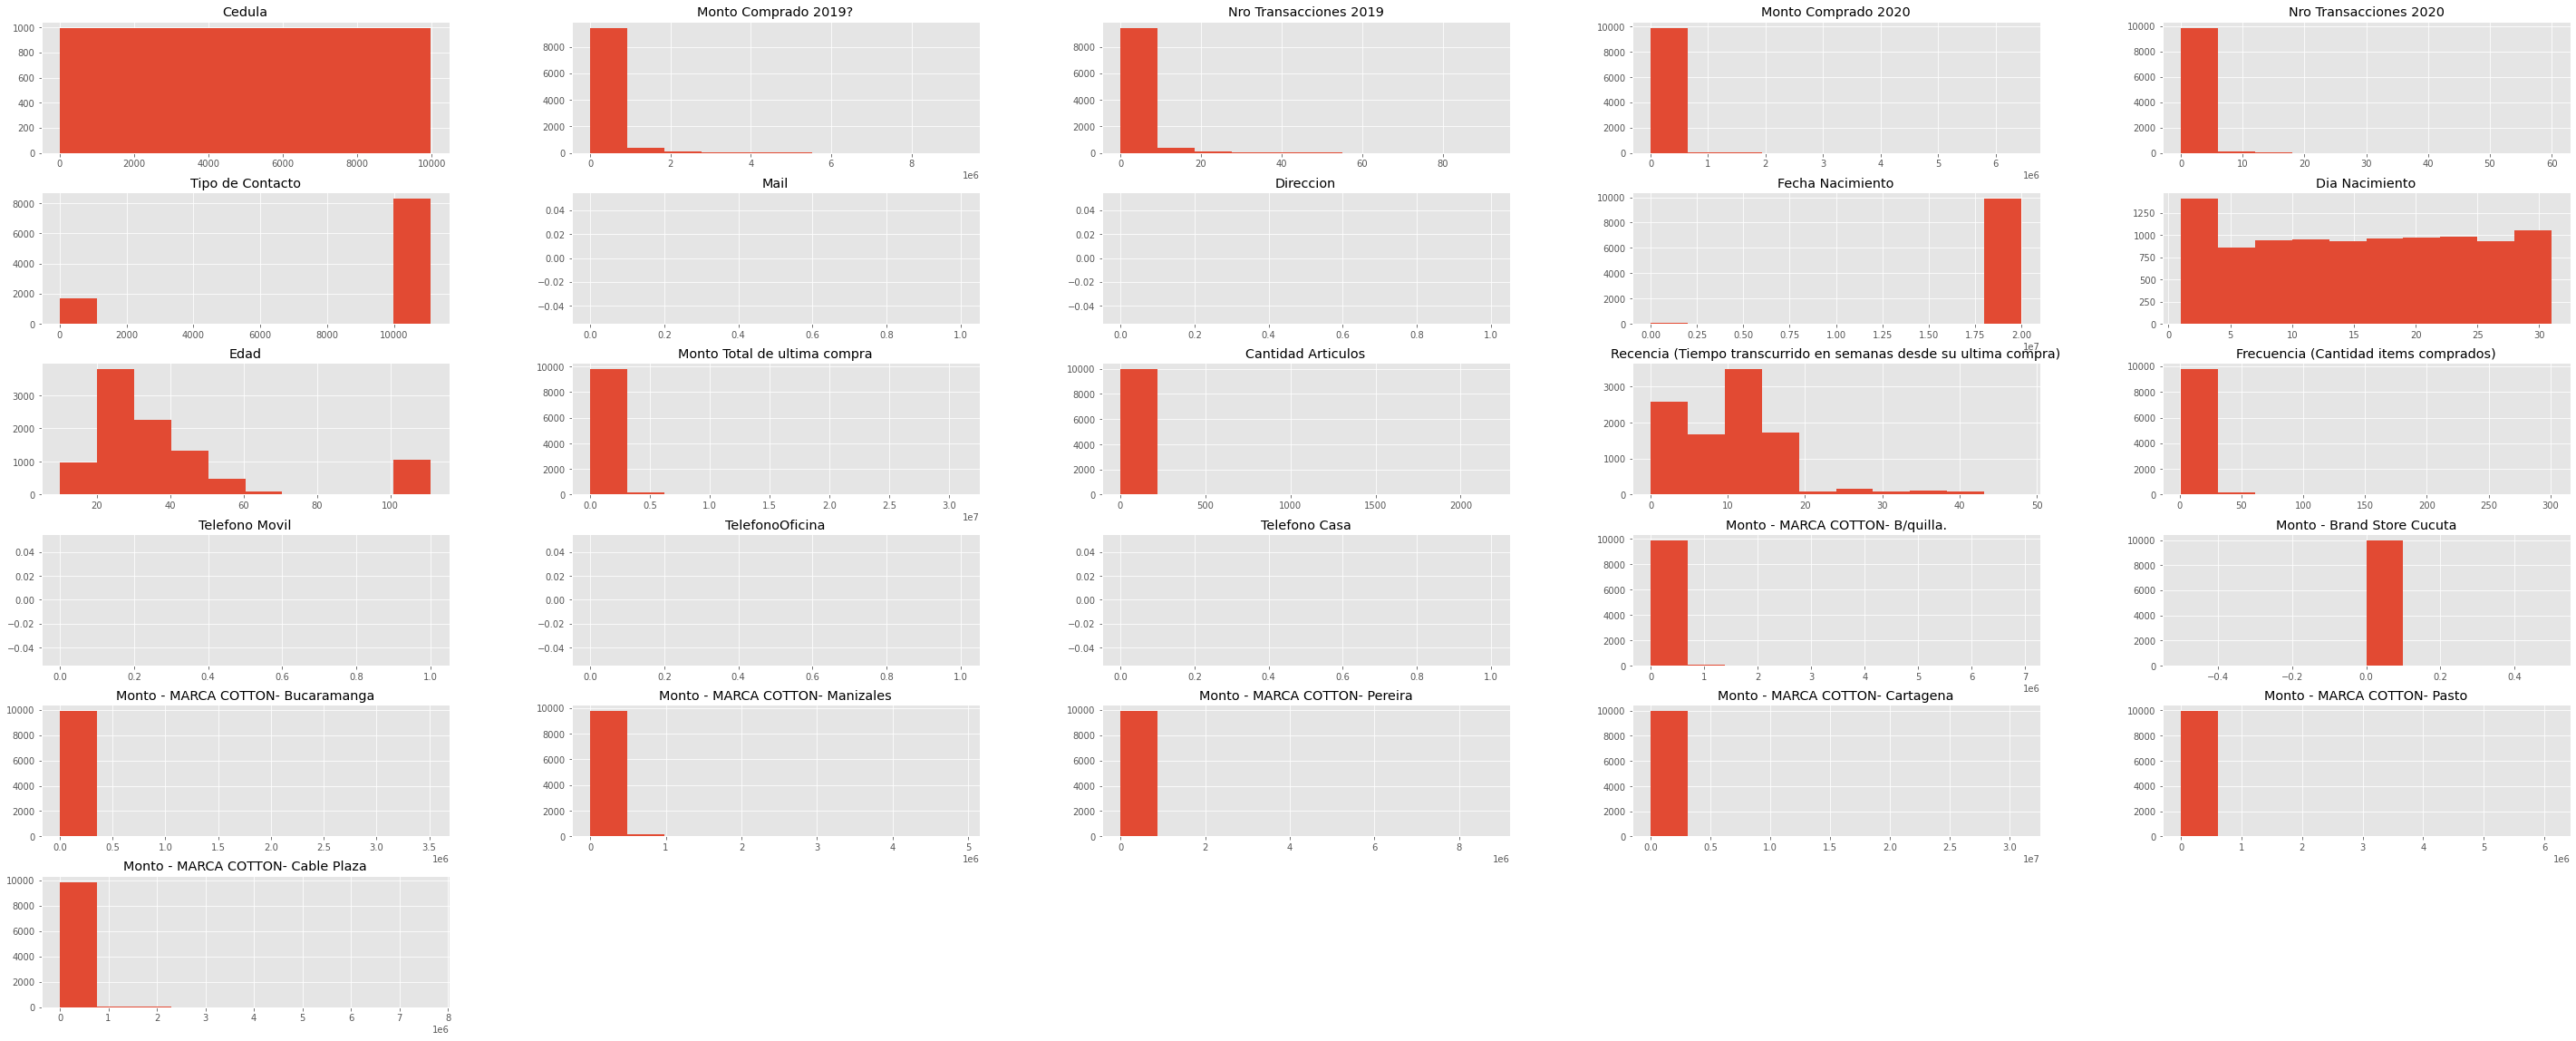

In [ ]:
data.drop(['Segmento'],1).hist()
plt.show()

In [ ]:
data.columns

Index(['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Tipo de Contacto', 'Es Contactable',
       'Ciudad de Residencia', 'Mail', 'Direccion', 'Genero', 'Estado Civil',
       'Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)', 'Direccion Valido?',
       'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?',
       'Telefono Movil', 'TelefonoOficina', 'Telefono Casa',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta',
       'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales',
       'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena',
       'Monto - MARCA COTTON- Pasto', 'Monto - MARCA

In [ ]:
#Renombrar columnas
data.rename(columns={'Monto Total de ultima compra':'Monto total',
                     'Recencia (Tiempo transcurrido en semanas desde su ultima compra)':'Recencia',
                     'Frecuencia (Cantidad items comprados)':'Frecuencia'}, inplace=True)

In [ ]:
#Crear nuevo dataframe de variables
dataframe = data[['Edad', 'Monto total', 'Recencia', 'Frecuencia','Genero']]

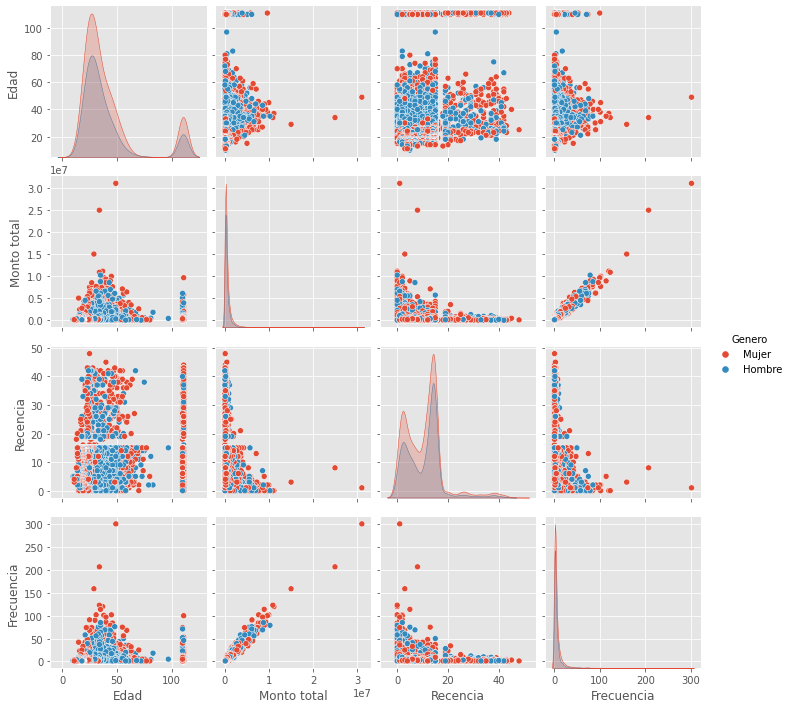

In [ ]:
sns.pairplot(dataframe.dropna(), hue='Genero', vars=['Edad', 'Monto total', 'Recencia', 'Frecuencia'], kind='scatter')

In [ ]:
#Transformar variable de genero a numerica
data_dum = pd.get_dummies(data, columns =['Genero'], drop_first = True)
data_dum.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,Es Contactable,Ciudad de Residencia,Mail,Direccion,Estado Civil,Fecha Nacimiento,Mes Nacimiento,Dia Nacimiento,Edad,Monto total,Cantidad Articulos,Recencia,Frecuencia,Direccion Valido?,Mail Valido?,Cel Valido?,Tel Ofc Valid?,Tel Casa Valido?,Telefono Movil,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza,Genero_Mujer
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,Si,BUCARAMANGA,NaN,NaN,No hay informacion,19000225,Febrero,25,111,719400,10,12,6,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,Si,BARRANQUILLA,NaN,NaN,No hay informacion,19561016,Octubre,16,54,179900,1,12,1,Si,Si,No,No,Si,NaN,NaN,NaN,179900,0,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,Si,BARRANQUILLA,NaN,NaN,No hay informacion,19550707,Julio,7,55,921700,25,9,13,Si,Si,Si,No,Si,NaN,NaN,NaN,451200,0,0,0,0,0,0,0,1
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,Si,MANIZALES,NaN,NaN,No hay informacion,19620520,Mayo,20,48,2235300,50,2,17,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,1859600,1
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,Si,FLORIDABLANCA,NaN,NaN,No hay informacion,19660709,Julio,9,44,362500,8,3,5,Si,Si,Si,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1


In [ ]:
data_dum.columns

Index(['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Tipo de Contacto', 'Es Contactable',
       'Ciudad de Residencia', 'Mail', 'Direccion', 'Estado Civil',
       'Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto total', 'Cantidad Articulos', 'Recencia', 'Frecuencia',
       'Direccion Valido?', 'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?',
       'Tel Casa Valido?', 'Telefono Movil', 'TelefonoOficina',
       'Telefono Casa', 'Monto - MARCA COTTON- B/quilla.',
       'Monto - Brand Store Cucuta', 'Monto - MARCA COTTON- Bucaramanga',
       'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira',
       'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto',
       'Monto - MARCA COTTON- Cable Plaza', 'Genero_Mujer'],
      dtype='object')

In [ ]:
#Para el caso de segmentacion solo se eligen 3 columnas, estofacilita las graficas de los clusters.
X = np.array(data_dum[['Monto total','Recencia','Frecuencia',]])
y = np.array(data_dum['Genero_Mujer'])
X.shape

(9976, 3)

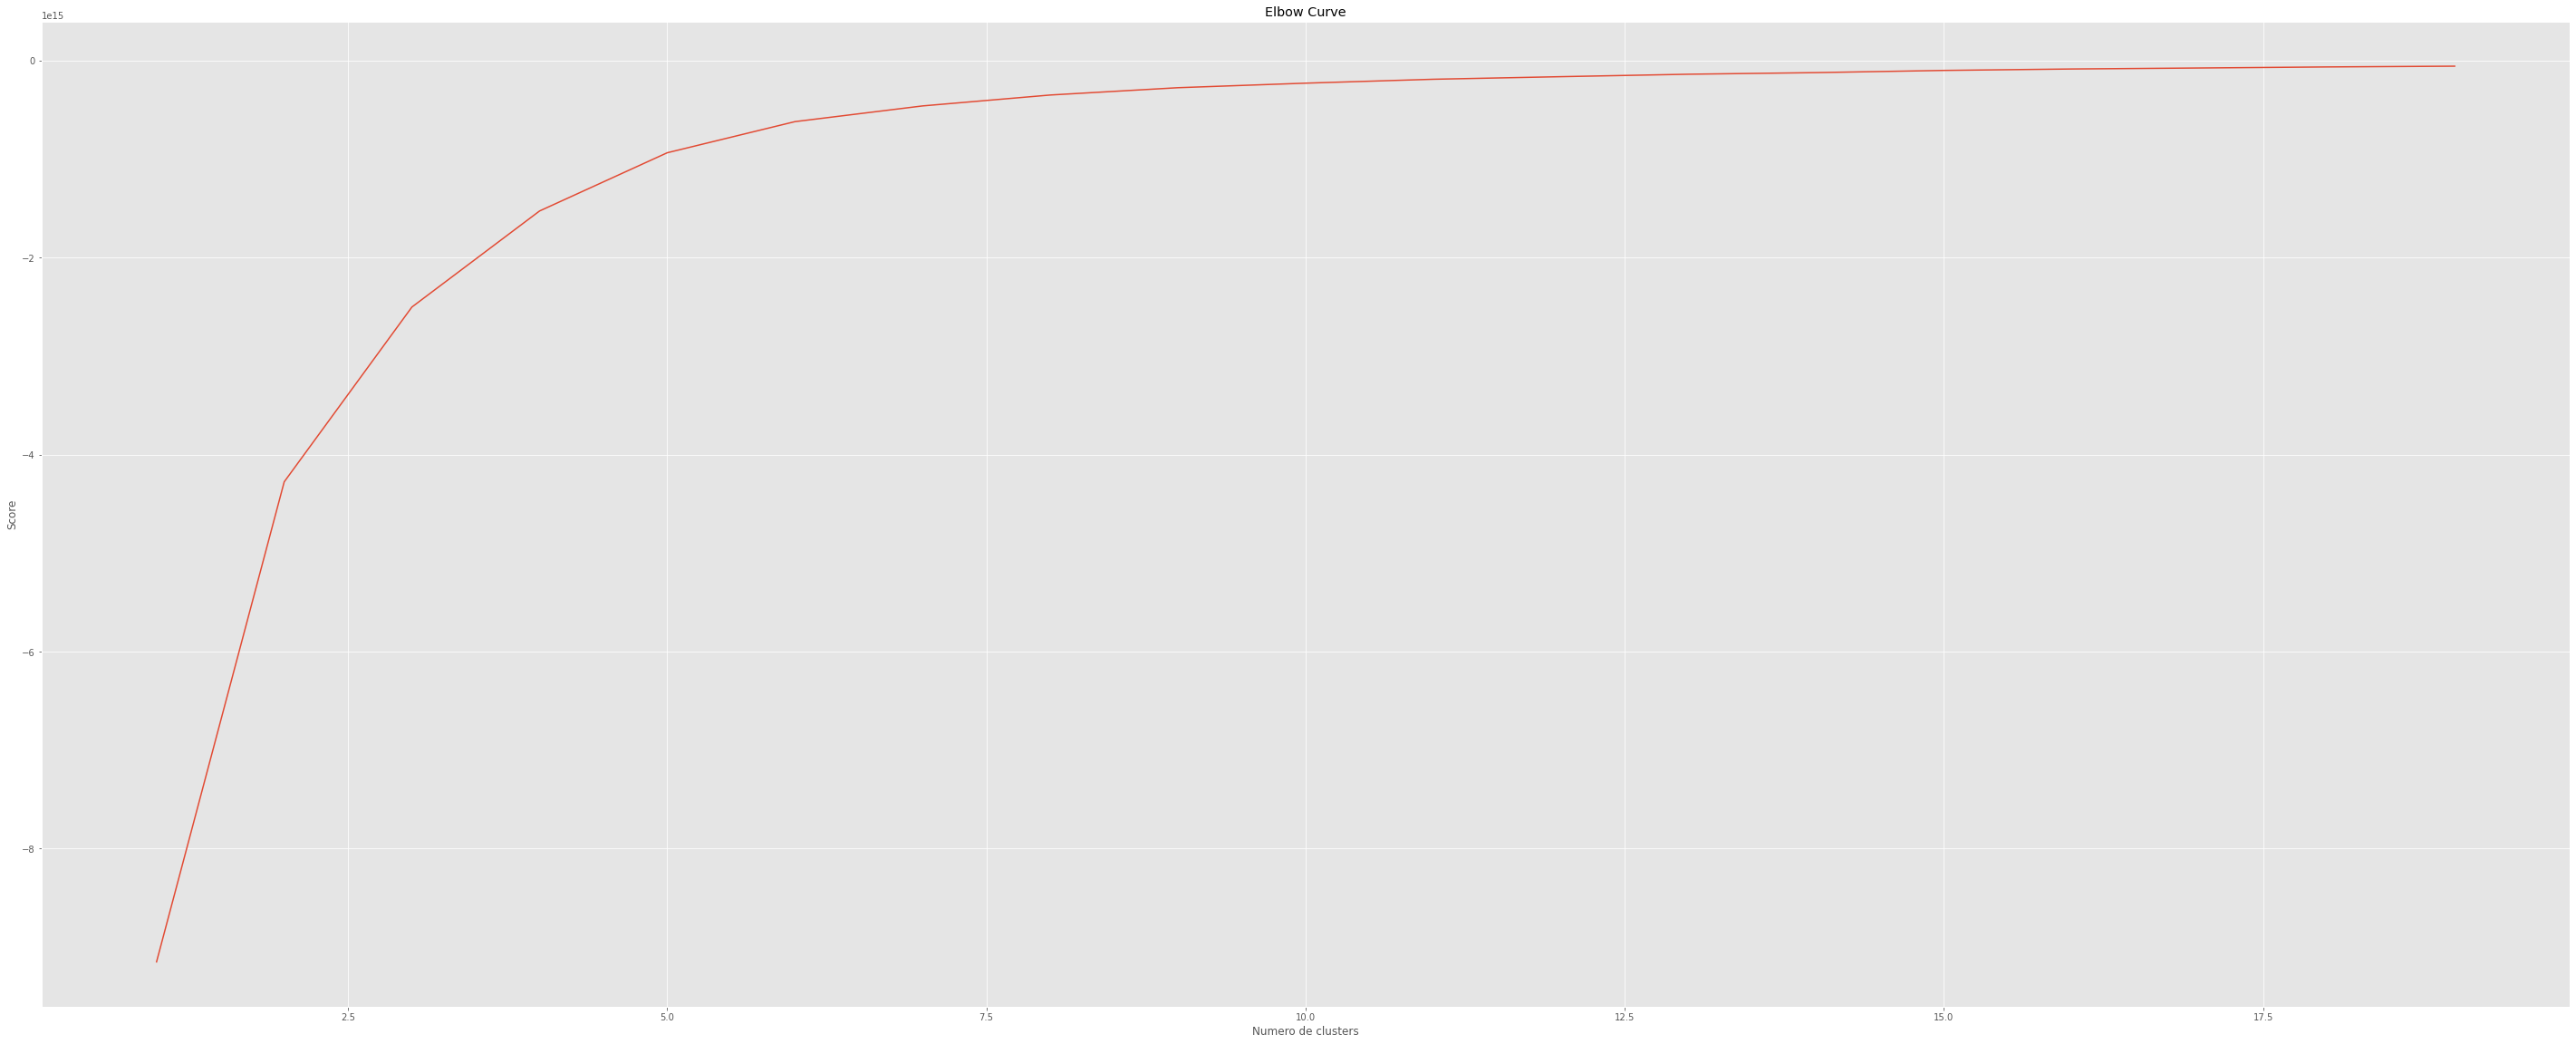

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Se eligen 4 clusters
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.15274132e+05 1.15116997e+01 3.09644851e+00]
 [5.34334294e+06 2.28491620e+00 5.37486034e+01]
 [1.61425015e+06 4.83502907e+00 1.55632267e+01]
 [2.79698500e+07 4.50000000e+00 2.54000000e+02]]


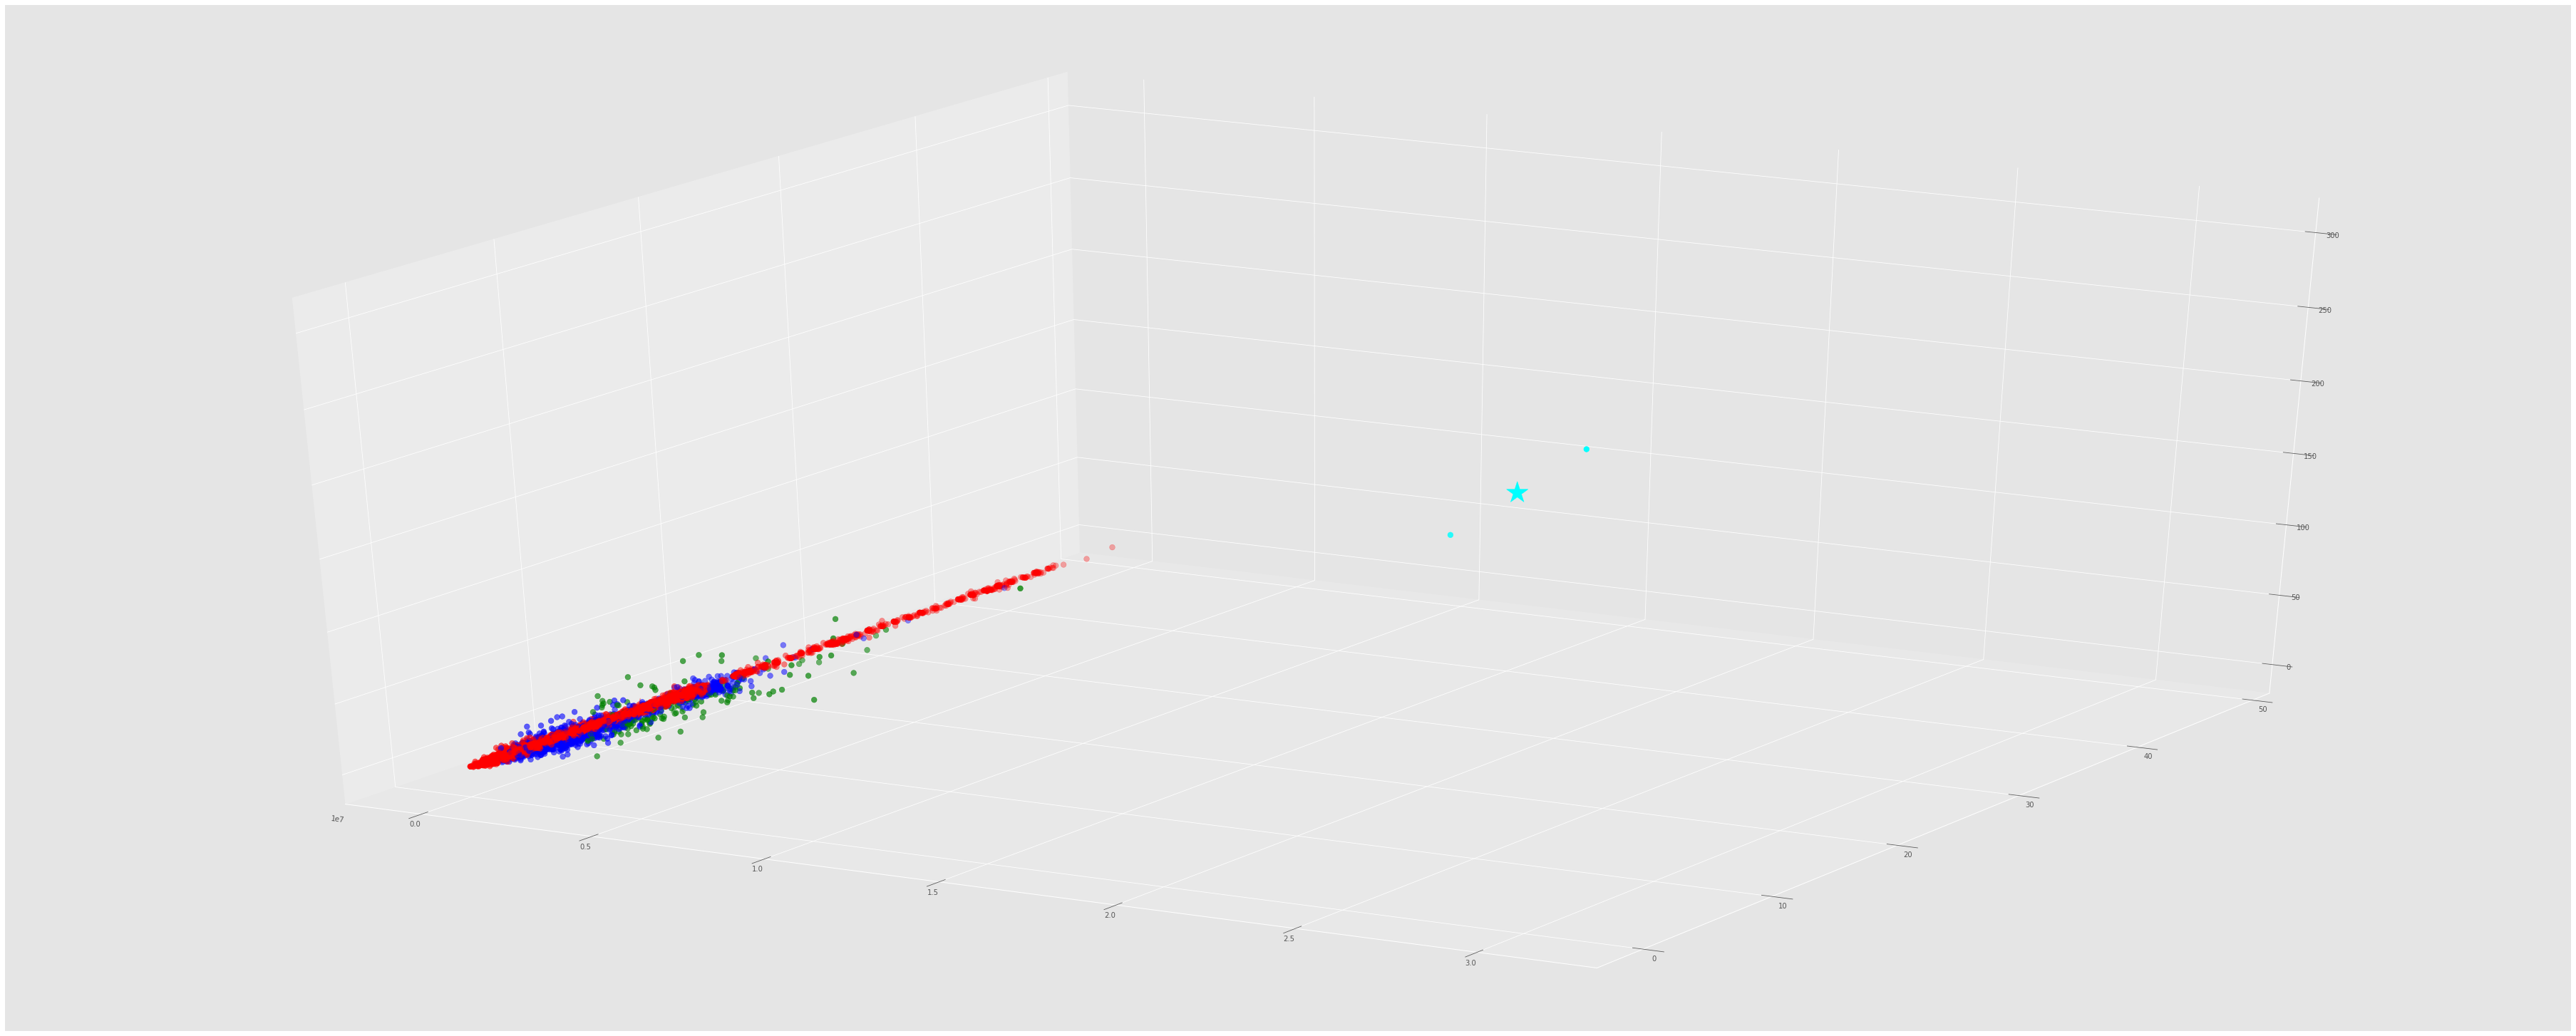

In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)

# Obtenemos los centroids
C = kmeans.cluster_centers_

#Colores por cluster
colores=['red','green','blue','cyan']

asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
#Grafica en 3D para identificar mejor la división de clusters
fig = px.scatter_3d(data, x=X[:,0], y=X[:,1], z=X[:,2], color=asignar)
fig.show()

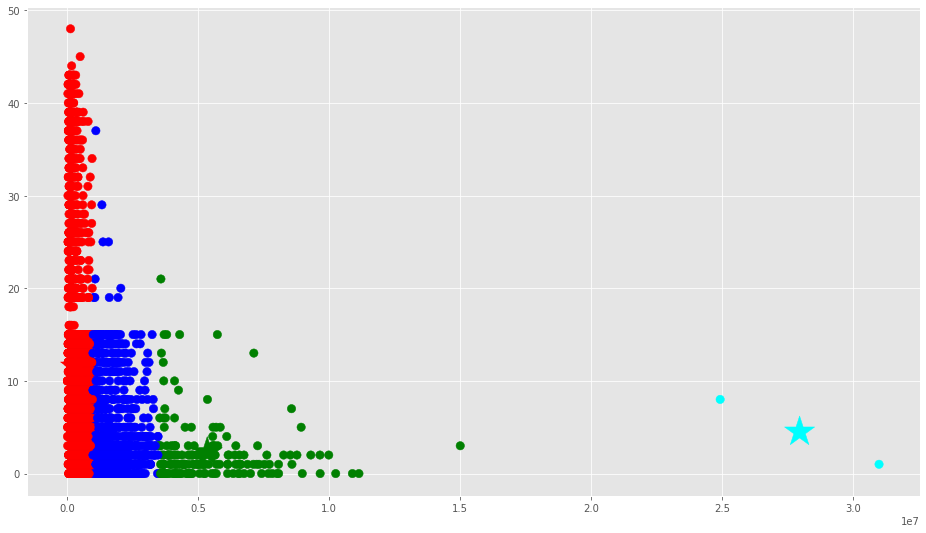

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
plt.rcParams['figure.figsize'] = (16, 9)
f1 = data['Monto total'].values
f2 = data['Recencia'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

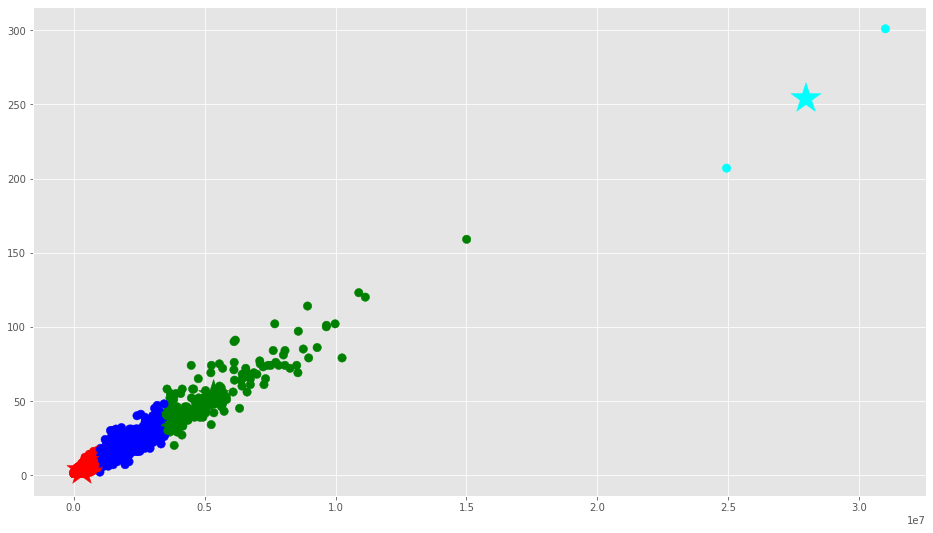

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
plt.rcParams['figure.figsize'] = (16, 9)
f1 = data['Monto total'].values
f2 = data['Frecuencia'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

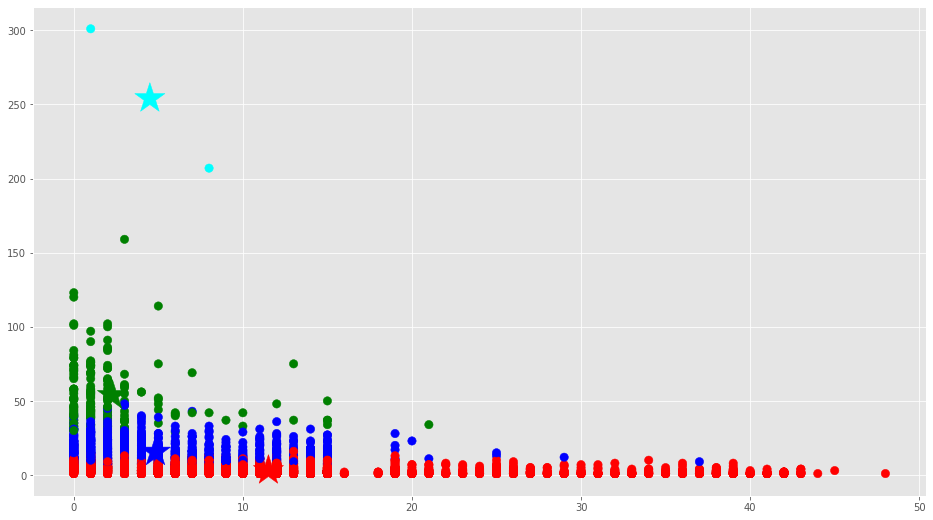

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
plt.rcParams['figure.figsize'] = (16, 9)
f1 = data['Recencia'].values
f2 = data['Frecuencia'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
data_dum.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,Es Contactable,Ciudad de Residencia,Mail,Direccion,Estado Civil,Fecha Nacimiento,Mes Nacimiento,Dia Nacimiento,Edad,Monto total,Cantidad Articulos,Recencia,Frecuencia,Direccion Valido?,Mail Valido?,Cel Valido?,Tel Ofc Valid?,Tel Casa Valido?,Telefono Movil,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza,Genero_Mujer
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,Si,BUCARAMANGA,NaN,NaN,No hay informacion,19000225,Febrero,25,111,719400,10,12,6,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,Si,BARRANQUILLA,NaN,NaN,No hay informacion,19561016,Octubre,16,54,179900,1,12,1,Si,Si,No,No,Si,NaN,NaN,NaN,179900,0,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,Si,BARRANQUILLA,NaN,NaN,No hay informacion,19550707,Julio,7,55,921700,25,9,13,Si,Si,Si,No,Si,NaN,NaN,NaN,451200,0,0,0,0,0,0,0,1
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,Si,MANIZALES,NaN,NaN,No hay informacion,19620520,Mayo,20,48,2235300,50,2,17,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,1859600,1
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,Si,FLORIDABLANCA,NaN,NaN,No hay informacion,19660709,Julio,9,44,362500,8,3,5,Si,Si,Si,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1


In [ ]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['Cedula']=data['Cedula'].values
copy['Segmento']=data['Segmento'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,8421
1,green,179
2,blue,1374
3,cyan,2


In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
display(group_referrals)

# Distribución del grupo 0 en cada segmento inicial
display(group_referrals.groupby('Segmento').size())

,Cedula,Segmento,label
0,1,Aficionados,0
1,2,Esporádicos,0
2,3,Aficionados,0
4,5,Aficionados,0
5,6,Aficionados,0
...,...,...,...
9971,9972,Aficionados,0
9972,9973,Aficionados,0
9973,9974,Aficionados,0
9974,9975,Esporádicos,0


Segmento
Aficionados    5476
Curiosos        156
Esporádicos    2495
Inactivo        294
dtype: int64

In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 1
group_referrer_index = copy['label'] == 1
group_referrals = copy[group_referrer_index]
display(group_referrals)

# Distribución del grupo 1 en cada segmento inicial
display(group_referrals.groupby('Segmento').size())

,Cedula,Segmento,label
59,60,Aficionados,1
126,127,Adictos,1
135,136,Adictos,1
249,250,Adictos,1
257,258,Adictos,1
...,...,...,...
8071,8072,Adictos,1
8444,8445,Adictos,1
8496,8497,Adictos,1
8517,8518,Adictos,1


Segmento
Adictos        168
Aficionados     11
dtype: int64

In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 2
group_referrer_index = copy['label'] == 2
group_referrals = copy[group_referrer_index]
display(group_referrals)

# Distribución del grupo 2 en cada segmento inicial
display(group_referrals.groupby('Segmento').size())

,Cedula,Segmento,label
3,4,Aficionados,2
16,17,Aficionados,2
25,26,Aficionados,2
37,38,Aficionados,2
39,40,Aficionados,2
...,...,...,...
9748,9749,Aficionados,2
9829,9830,Curiosos,2
9841,9842,Aficionados,2
9850,9851,Aficionados,2


Segmento
Adictos          11
Aficionados    1358
Curiosos          3
Inactivo          2
dtype: int64

In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 3
group_referrer_index = copy['label'] == 3
group_referrals = copy[group_referrer_index]
display(group_referrals)

# Distribución del grupo 3 en cada segmento inicial
display(group_referrals.groupby('Segmento').size())

,Cedula,Segmento,label
4442,4443,Adictos,3
4865,4866,Adictos,3


Segmento
Adictos    2
dtype: int64

# Visualización de resultados

In [ ]:
# Join copy and data
caracerizacion_df = copy.merge(data,on=['Cedula','Segmento'])
caracerizacion_df.head(5)

,Cedula,Segmento,label,Nombre Completo,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,Es Contactable,Ciudad de Residencia,Mail,Direccion,Genero,Estado Civil,Fecha Nacimiento,Mes Nacimiento,Dia Nacimiento,Edad,Monto total,Cantidad Articulos,Recencia,Frecuencia,Direccion Valido?,Mail Valido?,Cel Valido?,Tel Ofc Valid?,Tel Casa Valido?,Telefono Movil,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Aficionados,0,Nombre Cliente 1,Si,No,264800,2,0,0,11001,Si,BUCARAMANGA,NaN,NaN,Mujer,No hay informacion,19000225,Febrero,25,111,719400,10,12,6,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Esporádicos,0,Nombre Cliente 2,Si,No,179900,1,0,0,11001,Si,BARRANQUILLA,NaN,NaN,Hombre,No hay informacion,19561016,Octubre,16,54,179900,1,12,1,Si,Si,No,No,Si,NaN,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Aficionados,0,Nombre Cliente 3,Si,No,189800,2,0,0,11101,Si,BARRANQUILLA,NaN,NaN,Mujer,No hay informacion,19550707,Julio,7,55,921700,25,9,13,Si,Si,Si,No,Si,NaN,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Aficionados,2,Nombre Cliente 4,Si,No,65900,1,0,0,11001,Si,MANIZALES,NaN,NaN,Mujer,No hay informacion,19620520,Mayo,20,48,2235300,50,2,17,Si,Si,No,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Aficionados,0,Nombre Cliente 5,Si,No,238800,2,0,0,11101,Si,FLORIDABLANCA,NaN,NaN,Mujer,No hay informacion,19660709,Julio,9,44,362500,8,3,5,Si,Si,Si,No,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
#Crear base para visualización
rfm_scaled=caracerizacion_df[['Cedula', 'Segmento', 'label','Frecuencia','Recencia','Monto total']]
rfm_scaled

,Cedula,Segmento,label,Frecuencia,Recencia,Monto total
0,1,Aficionados,0,6,12,719400
1,2,Esporádicos,0,1,12,179900
2,3,Aficionados,0,13,9,921700
3,4,Aficionados,2,17,2,2235300
4,5,Aficionados,0,5,3,362500
...,...,...,...,...,...,...
9971,9972,Aficionados,0,4,6,191260
9972,9973,Aficionados,0,5,6,371600
9973,9974,Aficionados,0,3,3,254960
9974,9975,Esporádicos,0,1,4,159920


In [ ]:
# Melt del dataframe
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['Cedula', 'Segmento', 'label'], var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,Cedula,Segmento,label,Metrics,Value
0,1,Aficionados,0,Frecuencia,6
1,2,Esporádicos,0,Frecuencia,1
2,3,Aficionados,0,Frecuencia,13
3,4,Aficionados,2,Frecuencia,17
4,5,Aficionados,0,Frecuencia,5


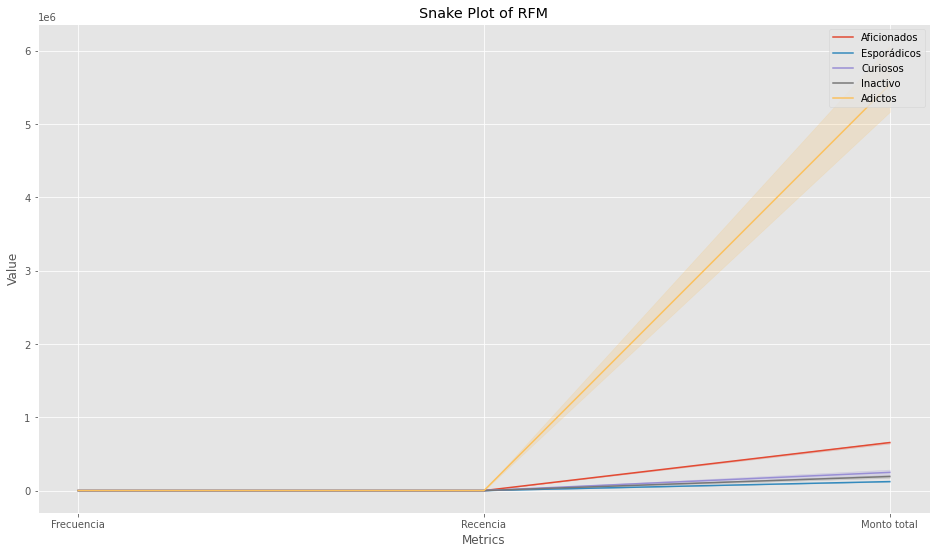

In [ ]:
# Snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Segmento', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

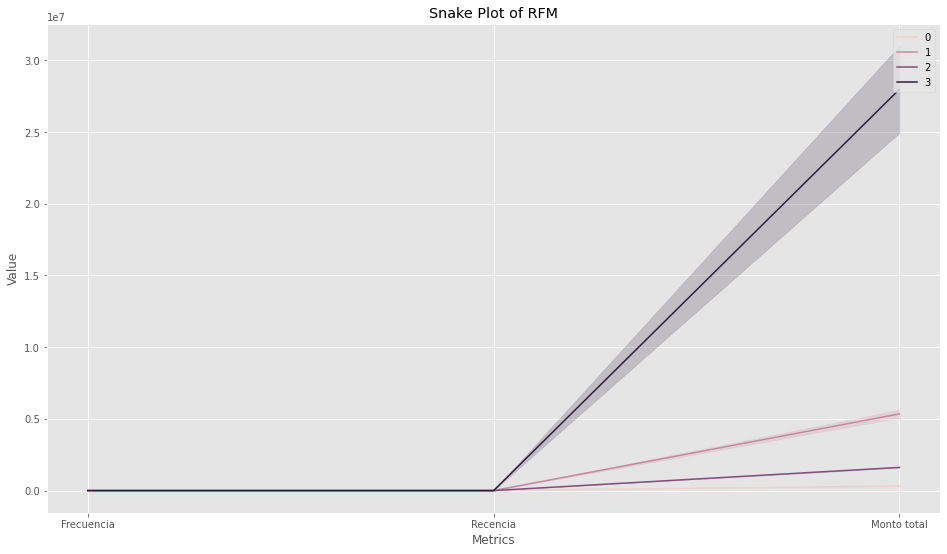

In [ ]:
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'label', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

[]

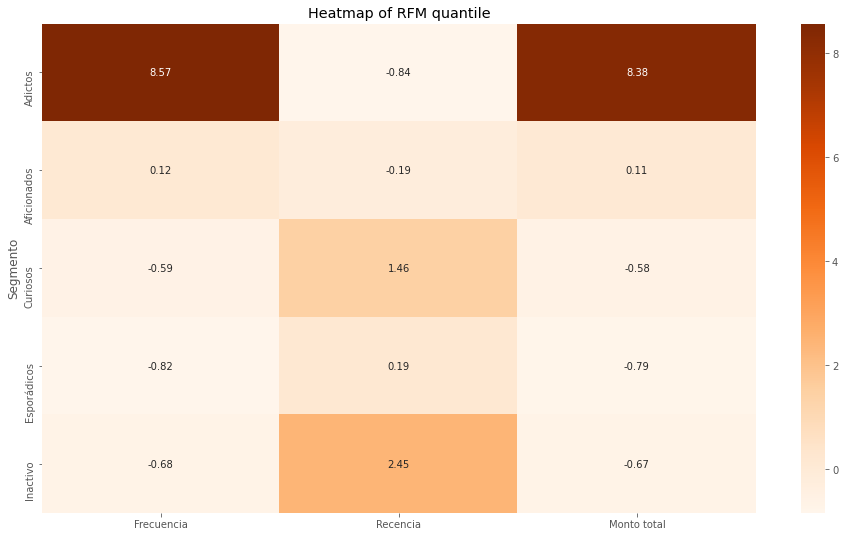

In [ ]:
# the mean value in total 
total_avg = rfm_scaled.iloc[:, 3:].mean()
total_avg

# calculate the proportional gap with total mean
cluster_avg = rfm_scaled.groupby('Segmento').mean().iloc[:, 2:]
prop_rfm = cluster_avg/total_avg - 1

# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

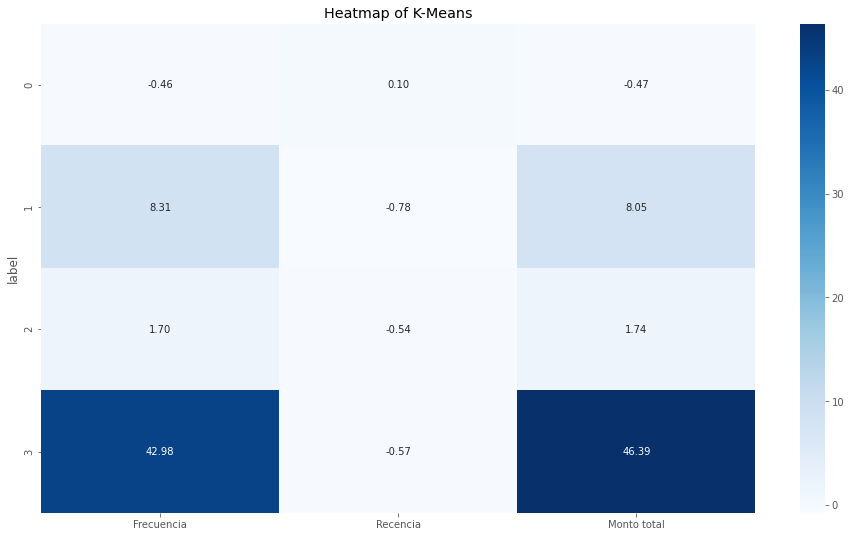

In [ ]:
# calculate the proportional gap with total mean
cluster_avg_K = rfm_scaled.groupby('label').mean().iloc[:, 1:]
prop_rfm_K = cluster_avg_K/total_avg - 1

# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()

Para cada cluster se puede concluir:
- Cluster 0: Son clientes que compran poco, visitan poco la tienda y gastan poco.
- Cluster 1: Son clientes que compran en media cantidad, tardan poco en ir a la tienda y gastan en media cantidad.
- Cluster 2: Son clientes que compran poco, tardan poco en ir a la tienda y gastan poco en sus compras.
- Cluster 3: Son clientes que compran mas productos, tardan poco en ir a la tienda y gastan más.